In [ ]:
#!pip install yfinance

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

%matplotlib inline
plt.style.use('seaborn-darkgrid')

**1) Extracting S&P 500 Stock List** <br>
Source from wikipedia

In [7]:
#source from wiki
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

SP500_full = pd.read_html(url)[0]

In [8]:
SP500_full.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [11]:
#Extracting only the ticker list
SP500_ticker = SP500_full['Symbol'].tolist()

In [12]:
#parsing tickers to list, remove special characters
SP500_ticker = [ticker.replace(".","-") for ticker in SP500_ticker]

**2) Retrieving Historic Data** <br>

In [20]:
tickers = ['UL', 'PG', 'CL', 'KMB']

In [21]:
price_data = yf.download(tickers, start="2022-01-02")['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [22]:
price_data.head()

,CL,KMB,PG,UL
Date,,,,
2022-01-03,84.132973,142.429993,162.025360,53.549469
2022-01-04,84.411469,143.199997,162.592316,53.291924
2022-01-05,84.759575,144.059998,163.328339,53.192867
2022-01-06,84.202599,143.119995,161.955750,52.667870
2022-01-07,83.983788,143.740005,161.866226,53.291924


**3) Plotting - Same Size Comparison** <br>
For visualising the price of different assets, to make them comparable,  divide the entire price series by its respective first price value. This will make the changes comparable. 

Hence, one way is to divide it by the first price so that we can compare them on the same scale. This helps us to compare stocks with different price basis.

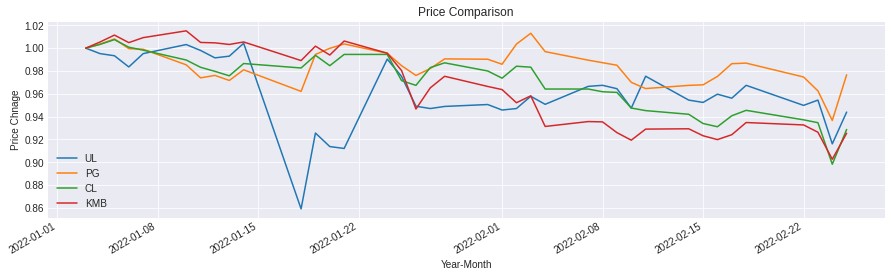

In [28]:
# Plot the absolute price series
plt.figure(figsize=(15,4))
(price_data['UL']/price_data['UL'].iloc[0]).plot()
(price_data['PG']/price_data['PG'].iloc[0]).plot()
(price_data['CL']/price_data['CL'].iloc[0]).plot()
(price_data['KMB']/price_data['KMB'].iloc[0]).plot()

# Set the title and axes label
plt.title('Price Comparison', fontsize=12)
plt.xlabel('Year-Month', fontsize=10)
plt.ylabel('Price Chnage', fontsize=10)
plt.legend()
plt.show()